In [279]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame

# extract Tesla from Yahoo Stock Prices

start = datetime.datetime(2019, 1, 1)
end = datetime.datetime(2020, 4, 30)

df = web.DataReader("TSLA", 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,315.130005,298.799988,306.100006,310.119995,11658600,310.119995
2019-01-03,309.399994,297.380005,307.000000,300.359985,6965200,300.359985
2019-01-04,318.000000,302.730011,306.000000,317.690002,7394100,317.690002
2019-01-07,336.739990,317.750000,321.720001,334.959991,7551200,334.959991
2019-01-08,344.010010,327.019989,341.959991,335.350006,7008500,335.350006


In [280]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-04-24,730.729980,698.179993,710.809998,725.150024,13237600,725.150024
2020-04-27,799.489990,735.000000,737.609985,798.750000,20681400,798.750000
2020-04-28,805.000000,756.690002,795.640015,769.119995,15222000,769.119995
2020-04-29,803.200012,783.159973,790.169983,800.510010,16216000,800.510010
2020-04-30,869.820007,763.500000,855.190002,781.880005,28400100,781.880005


In [281]:
df.dropna()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,315.130005,298.799988,306.100006,310.119995,11658600,310.119995
2019-01-03,309.399994,297.380005,307.000000,300.359985,6965200,300.359985
2019-01-04,318.000000,302.730011,306.000000,317.690002,7394100,317.690002
2019-01-07,336.739990,317.750000,321.720001,334.959991,7551200,334.959991
2019-01-08,344.010010,327.019989,341.959991,335.350006,7008500,335.350006
...,...,...,...,...,...,...
2020-04-24,730.729980,698.179993,710.809998,725.150024,13237600,725.150024
2020-04-27,799.489990,735.000000,737.609985,798.750000,20681400,798.750000
2020-04-28,805.000000,756.690002,795.640015,769.119995,15222000,769.119995


In [282]:
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()

In [283]:
# Code for the Rolling Mean:

close_px = df['Adj Close']
mavg = close_px.rolling(window=300).mean()

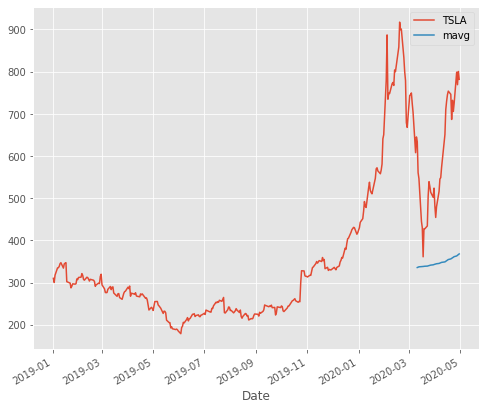

In [284]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='TSLA')
mavg.plot(label='mavg')
plt.legend()

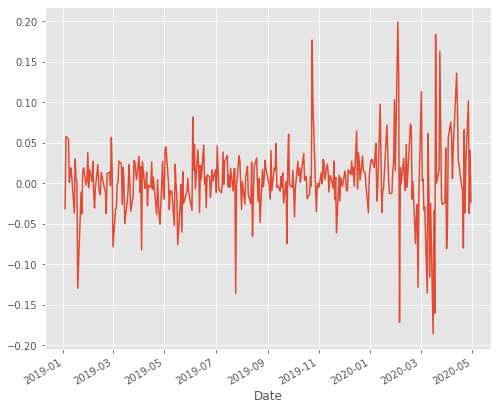

In [285]:
rets = close_px / close_px.shift(1) - 1
rets.plot(label='return''Plotting the Return Rate' )

In [286]:
#This will returns a table of closing prices among the stocks prices from Yahoo Finance
dfcomp = web.DataReader(['AAPL', 'MAR', 'TSLA', 'AMZN', 'MSFT', 'UBER', 'NFLX'],'yahoo',start=start,end=end)['Adj Close']
dfcomp.head()

Symbols,AAPL,MAR,TSLA,AMZN,MSFT,UBER,NFLX
Date,,,,,,,
2019-01-02,155.214005,105.518723,310.119995,1539.130005,99.375191,NaN,267.660004
2019-01-03,139.753540,99.902061,300.359985,1500.280029,95.719376,NaN,271.200012
2019-01-04,145.719513,105.862404,317.690002,1575.390015,100.171211,NaN,297.570007
2019-01-07,145.395203,106.058792,334.959991,1629.510010,100.298965,NaN,315.339996
2019-01-08,148.166870,107.777176,335.350006,1656.579956,101.026199,NaN,320.269989


In [287]:
 dfcomp.tail()

Symbols,AAPL,MAR,TSLA,AMZN,MSFT,UBER,NFLX
Date,,,,,,,
2020-04-24,282.970001,80.709999,725.150024,2410.219971,174.550003,29.490000,424.989990
2020-04-27,283.170013,85.269997,798.750000,2376.000000,174.050003,30.080000,421.380005
2020-04-28,278.579987,87.419998,769.119995,2314.080078,169.809998,30.120001,403.829987
2020-04-29,287.730011,95.989998,800.510010,2372.709961,177.429993,31.370001,411.890015
2020-04-30,293.799988,90.940002,781.880005,2474.000000,179.210007,30.270000,419.850006


In [288]:
retscomp = dfcomp.pct_change()
corr = retscomp.corr()
corr

Symbols,AAPL,MAR,TSLA,AMZN,MSFT,UBER,NFLX
Symbols,,,,,,,
AAPL,1.000000,0.491324,0.440447,0.670169,0.836404,0.394860,0.523009
MAR,0.491324,1.000000,0.406928,0.289111,0.442930,0.546944,0.236927
TSLA,0.440447,0.406928,1.000000,0.385957,0.446507,0.551502,0.365887
AMZN,0.670169,0.289111,0.385957,1.000000,0.738196,0.364742,0.651727
MSFT,0.836404,0.442930,0.446507,0.738196,1.000000,0.433224,0.584871
UBER,0.394860,0.546944,0.551502,0.364742,0.433224,1.000000,0.389669
NFLX,0.523009,0.236927,0.365887,0.651727,0.584871,0.389669,1.000000


Text(0, 0.5, 'Returns TSLA')

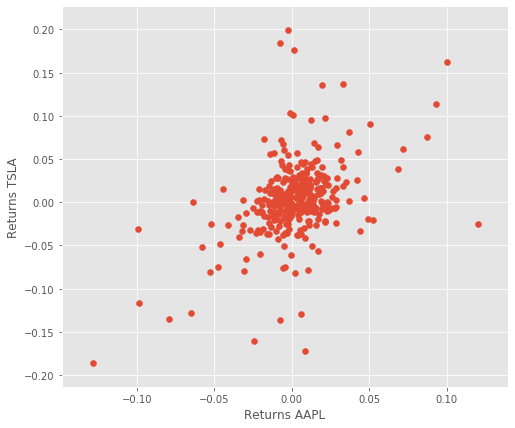

In [289]:
# Plot Apple and TSLA with ScatterPlot to view their return distributions.
plt.scatter(retscomp.AAPL, retscomp.TSLA)
plt.xlabel('Returns AAPL')
plt.ylabel('Returns TSLA')
# title: Scatter Plot of TSLA and AAPL We can see here that there are slight positive correlations 
# among TSLA returns and Apple returns. 
# It seems like that the higher the Apple returns, the higher TSLA returns...KINDA...SORTA...

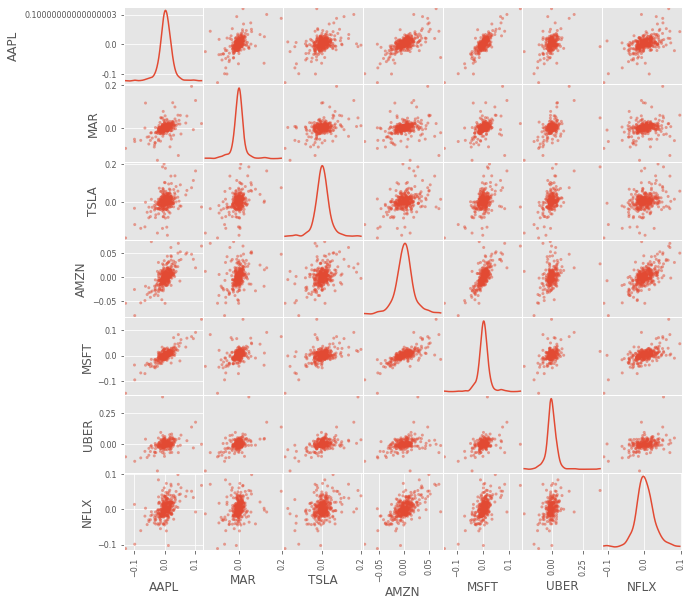

In [290]:
from pandas.plotting import scatter_matrix
pd.plotting.scatter_matrix(retscomp, diagonal='kde', figsize=(10, 10));

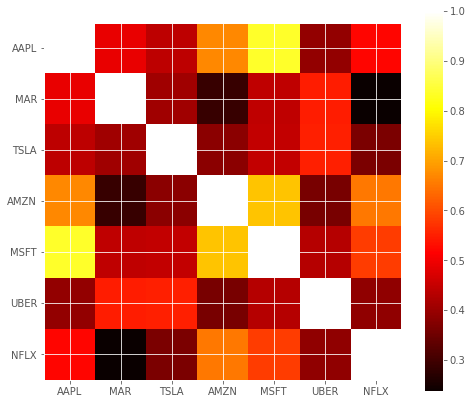

In [291]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);
#title: Heatmap of Correlations among competing stocks

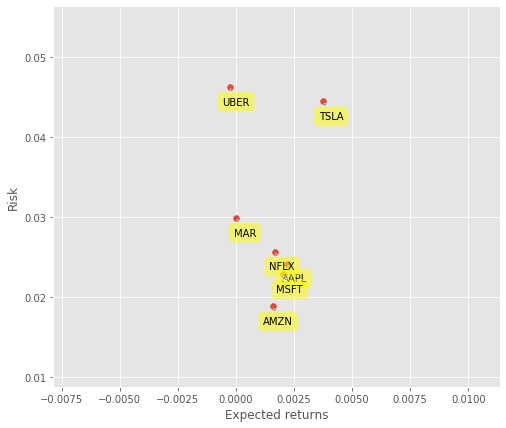

In [292]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = 'Fancy', connectionstyle = 'arc3,rad=0'))

In [293]:
dfreg = df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0

In [294]:
dfreg.head()

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2019-01-02,310.119995,11658600,5.265709,1.313293
2019-01-03,300.359985,6965200,4.001861,-2.162871
2019-01-04,317.690002,7394100,4.806569,3.820262
2019-01-07,334.959991,7551200,5.669331,4.115377
2019-01-08,335.350006,7008500,5.066355,-1.932970


In [295]:
dfreg.tail()

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2020-04-24,725.150024,13237600,4.488725,2.017421
2020-04-27,798.750000,20681400,8.073864,8.288935
2020-04-28,769.119995,15222000,6.281204,-3.333168
2020-04-29,800.510010,16216000,2.503409,1.308583
2020-04-30,781.880005,28400100,13.597995,-8.572364


In [296]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
import math
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing

In [297]:
# Drop missing value
dfreg.fillna(value=-99999, inplace=True)

In [298]:
# We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(dfreg)))

In [299]:
# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))
# Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)
# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
# Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]

In [300]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=109)
# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)
# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [301]:
from sklearn.neighbors import NearestNeighbors

In [302]:
# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [303]:
confidencereg = clfreg.score(X_test, y_test)
confidencepoly2 = clfpoly2.score(X_test,y_test)
confidencepoly3 = clfpoly3.score(X_test,y_test)
confidenceknn = clfknn.score(X_test, y_test)
# results
# OUR OWN('The linear regression confidence is ', 0.96399641826551985)
# OUR OWN('The quadratic regression 2 confidence is ', 0.96492624557970319)
# OUR OWN('The quadratic regression 3 confidence is ', 0.9652082834532858)
# OUR OWN('The knn regression confidence is ', 0.92844658034790639)

In [304]:
# confidence level frame regression

forecast_set = clfreg.predict(X_lately)
dfreg['Forecast'] = np.nan

# make it clfreg not just clf

In [305]:
forecast_set

array([824.71378727, 773.83956227, 810.53897309, 784.86287027])

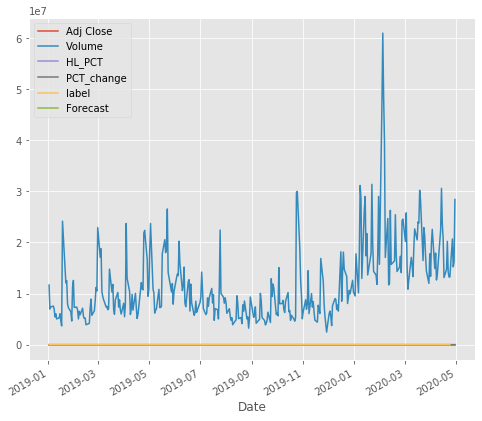

In [306]:
dfreg.plot()

In [307]:
# forecast_col.plot()

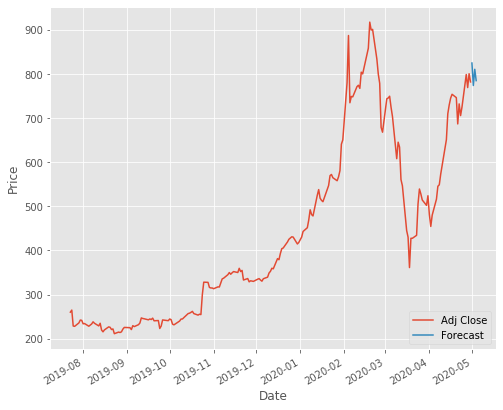

In [308]:
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
dfreg['Adj Close'].tail(200).plot()
dfreg['Forecast'].tail(200).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()